In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import umap
import glob
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel

In [150]:
path = r'D:\Data\cav_data' # use your path
all_files = glob.glob(path + "/fulldata*.csv")
print(all_files)
file_list = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0)
    file_list.append(df)

total_data_df = pd.concat(file_list, axis=0, ignore_index=True)

['D:\\Data\\cav_data\\fulldata_with_maxmin.csv']


In [151]:
print(total_data_df.shape)
total_data_df.head()

(107569, 288)


,fDie1wflow_en0,fDie1wflow_en1,fDie1wflow_en2,fDie1wflow_en3,fDie1wflow_en4,fDie1wflow_mse,fDie1wflow_mae,fDie2wflow_en0,fDie2wflow_en1,fDie2wflow_en2,...,Cast_date,Shift,Shot_no,dayOfWeek,cav1_defect,cav2_defect,defect,defect_smoothed,max_ratio,min_ratio
0,21.692999,0.759790,-0.968287,13.580341,-0.567633,0.002722,0.038137,9.908647,1.283877,-0.999141,...,2018-01-15,1,5,0,0,0,0,0.0,NaN,NaN
1,22.802261,1.165540,-0.969840,15.000215,-0.767543,0.002549,0.035166,9.719274,1.268317,-0.999214,...,2018-01-15,1,6,0,0,0,0,0.0,NaN,NaN
2,23.670288,1.490633,-0.969832,15.979490,-0.831797,0.002225,0.031885,9.586231,0.992506,-0.999257,...,2018-01-15,1,7,0,0,0,0,0.0,NaN,NaN
3,23.920792,2.118496,-0.968945,15.828067,-0.853646,0.001940,0.026800,9.413850,0.393041,-0.999068,...,2018-01-15,1,8,0,0,0,0,0.0,NaN,NaN
4,24.256344,2.081036,-0.970542,16.486008,-0.890179,0.001000,0.020291,9.127824,0.392960,-0.999210,...,2018-01-15,1,9,0,0,0,0,0.0,NaN,NaN


In [152]:
total_data_df.head()
deft=total_data_df['defect']
cav1_deft=total_data_df['cav1_defect']
cav2_deft=total_data_df['cav2_defect']
defect_smoothed=total_data_df['defect_smoothed']
#die4_data = total_data_df[total_data_df['Die'] == 4]
#die4_data.head()

In [128]:
die4_data_defect=die4_data['defect_smoothed']


In [153]:
total_data_df.head()
#die2_data.shape
#die3_data.to_csv(r'D:\Data\merged_data\die3_data.csv')

,fDie1wflow_en0,fDie1wflow_en1,fDie1wflow_en2,fDie1wflow_en3,fDie1wflow_en4,fDie1wflow_mse,fDie1wflow_mae,fDie2wflow_en0,fDie2wflow_en1,fDie2wflow_en2,...,Cast_date,Shift,Shot_no,dayOfWeek,cav1_defect,cav2_defect,defect,defect_smoothed,max_ratio,min_ratio
0,21.692999,0.759790,-0.968287,13.580341,-0.567633,0.002722,0.038137,9.908647,1.283877,-0.999141,...,2018-01-15,1,5,0,0,0,0,0.0,NaN,NaN
1,22.802261,1.165540,-0.969840,15.000215,-0.767543,0.002549,0.035166,9.719274,1.268317,-0.999214,...,2018-01-15,1,6,0,0,0,0,0.0,NaN,NaN
2,23.670288,1.490633,-0.969832,15.979490,-0.831797,0.002225,0.031885,9.586231,0.992506,-0.999257,...,2018-01-15,1,7,0,0,0,0,0.0,NaN,NaN
3,23.920792,2.118496,-0.968945,15.828067,-0.853646,0.001940,0.026800,9.413850,0.393041,-0.999068,...,2018-01-15,1,8,0,0,0,0,0.0,NaN,NaN
4,24.256344,2.081036,-0.970542,16.486008,-0.890179,0.001000,0.020291,9.127824,0.392960,-0.999210,...,2018-01-15,1,9,0,0,0,0,0.0,NaN,NaN


In [154]:
total_data_df = total_data_df.drop([ 'Die', 'Cast_date','cav1_defect','cav2_defect','Part','defect'], axis=1)
total_data_df.shape

(107569, 282)

In [155]:
total_data_df = total_data_df.drop(['fDie1wflow_mse','Shot_no','fDie2wflow_mse','mDie3wflow_mse','fDie2wflow_mae','mDie3wflow_mae','core4_mse', 'core6_mae','ep_mse', 'ep_mae','mDie2wflow_mae','dayOfWeek', 'shot_Pos1', 'shot_Inten.Time','shot_Biscuit',
  'fDie1wflow_mae','core5_mse','mDie1wflow_mse', 'core3_mse', 'core3_mae','Shift','dayOfWeek',
       'mDie1wflow_mae', 'core5_mae','tiebar_mse', 'tiebar_mae', 'sleevewflow_mse', 'sleevewflow_mae',  'tipwflow_mse', 'tipwflow_mae','injection_mse', 'injection_mae','lub_mse', 'lub_mae'], axis=1)
total_data_df.shape

(107569, 249)

In [105]:
#die4_data.to_csv(r'D:\Data\merged_data\die4_fulldata_minmaxdefect.csv')

In [156]:
total_data_df.fillna(0,inplace=True)

In [96]:
#lab=total_data_df['defect_smoothed']

In [176]:
features_df = total_data_df.drop(['defect_smoothed','max_ratio','min_ratio'], axis=1)
#features_df_die2 = pd.get_dummies(features_df_die2)
labels_df = total_data_df.loc[:, ['defect']]
features_df.head()
features_df.shape
labels_df.shape

KeyError: "None of [Index(['defect'], dtype='object')] are in the [columns]"

In [160]:
clf = DecisionTreeRegressor(random_state=100)
clf = clf.fit(features_df,labels_df)
dat=(clf.feature_importances_ )


In [162]:
model = SelectFromModel(clf, prefit=True,max_features=10)
data_reshap = model.transform(features_df)
data_reshap.shape 

(107569, 10)

(array([20., 73., 75., 51., 11., 11.,  2.,  2.,  0.,  1.]),
 array([0.00099965, 0.00220005, 0.00340045, 0.00460085, 0.00580124,
        0.00700164, 0.00820204, 0.00940243, 0.01060283, 0.01180323,
        0.01300363]),
 <a list of 10 Patch objects>)

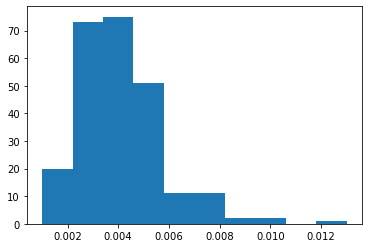

In [161]:
dat=(clf.feature_importances_  )
plt.hist(dat)
#dat

In [136]:
feature_idx = model.get_support()
feature_name = features_df.columns[feature_idx]
#plt.hist(feature_name)
feature_name

Index(['fDie1wflow_en1', 'mDie1wflow_en0', 'tipwflow_en1', 'core6_en2',
       'core6_en19', 'ep_en0', 'ep_en10', 'injection_en27', 'shot_Vel1',
       'shot_Vel3'],
      dtype='object')

In [103]:
from fcmeans import FCM
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter

In [167]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_reshap)
print(scaled_features.shape)


(107569, 10)


Total variance explained: 0.5038458719529089
[2.34555953 1.51911005 1.17383598]
[0.23455377 0.15190959 0.11738251]
[0.23455377 0.38646337 0.50384587]
[[ 3.93969827  4.93080031 -2.6086796 ]
 [ 3.28687603  3.47500146  0.83590088]
 [ 3.24680714  3.19101437  0.75774951]
 ...
 [-0.84830138  1.22096793 -0.05269683]
 [-0.85731311  1.56553635  0.27621464]
 [-1.21784453 -0.85886826 -1.95450577]]


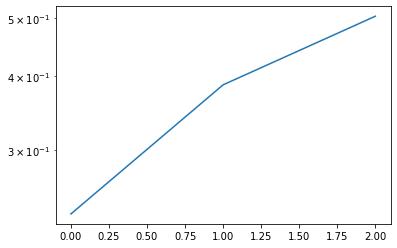

In [214]:
pca = PCA(n_components=3)
trans_features= pca.fit_transform(scaled_features)

print('Total variance explained:', pca.explained_variance_ratio_.sum())
plt.semilogy(pca.explained_variance_ratio_.cumsum())


print (pca.explained_variance_)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())
print(trans_features)


In [228]:
# fit the fuzzy-c-means
fcm = FCM(n_clusters=3)
fcm.fit(trans_features)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)

print((trans_features))
#print(fcm_labels,fcm_centers)
# plot result
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(trans_features[:,0], trans_features[:,1], ax=axes[0])
scatter(trans_features[:,0], trans_features[:,1], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="s",s=200)
#scatter(fcm_centers[:,0], fcm_centers[:,2], ax=axes[1],marker="s",s=200)
#scatter(fcm_centers[:,1], fcm_centers[:,2], ax=axes[1],marker="s",s=200)
plt.show()
print(fcm_centers[:,0], fcm_centers[:,1])

AttributeError: 'FCM' object has no attribute 'trans_features'

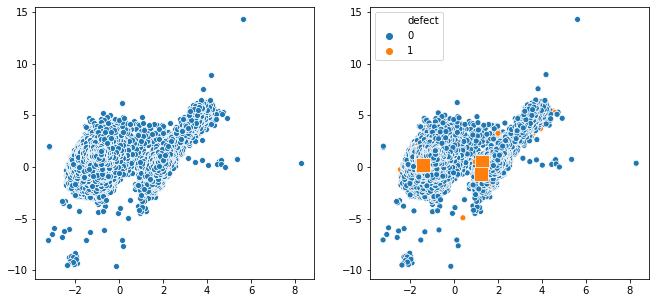

In [216]:
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(trans_features[:,0], trans_features[:,1], ax=axes[0])
scatter(trans_features[:,0], trans_features[:,1], ax=axes[1], hue=deft)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="s",s=200)
plt.show()


In [ ]:
deft=total_data_df['defect']
cav1_deft=total_data_df['cav1_defect']
cav2_deft=total_data_df['cav2_defect']
defect_smoothed=total_data_df['defect_smoothed']

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [193]:
fcm=FuzzyCMeans(n_clusters=6, m=2, max_iter=1000, tol=1e-5)
fcm.fit(die1_data_reshap)


FuzzyCMeans(init=None, m=2, max_iter=1000, n_clusters=6, random_state=None,
            tol=1e-05)

In [38]:
#total_data_df['Die'].unique()

array([1, 3, 4, 2], dtype=int64)

In [4]:
total_features_df = total_data_df.drop(['File_No', 'Die', 'Cast_date','cav1_defect','cav2_defect','defect_smoothed'], axis=1)
total_features_df.head()

,fDie1wflow_en0,fDie1wflow_en1,fDie1wflow_en2,fDie1wflow_en3,fDie1wflow_en4,fDie1wflow_mse,fDie1wflow_mae,fDie2wflow_en0,fDie2wflow_en1,fDie2wflow_en2,...,tiebar_en13,tiebar_en14,tiebar_en15,tiebar_mse,tiebar_mae,Part,Shift,Shot_no,dayOfWeek,defect
0,21.692999,0.759790,-0.968287,13.580341,-0.567633,0.002722,0.038137,9.908647,1.283877,-0.999141,...,-0.483169,-0.611454,-0.387602,0.002732,0.035002,B1012-278-1,1,5,0,0
1,22.802261,1.165540,-0.969839,15.000215,-0.767543,0.002549,0.035166,9.719274,1.268317,-0.999214,...,-0.477430,-0.606745,-0.379443,0.002792,0.035812,B1012-278-1,1,6,0,0
2,23.670288,1.490633,-0.969832,15.979490,-0.831797,0.002225,0.031885,9.586231,0.992506,-0.999257,...,-0.474928,-0.604088,-0.373460,0.002860,0.037235,B1012-278-1,1,7,0,0
3,23.920792,2.118496,-0.968945,15.828067,-0.853646,0.001940,0.026800,9.413850,0.393041,-0.999068,...,-0.462039,-0.586925,-0.352818,0.002696,0.037237,B1012-278-1,1,8,0,0
4,24.256344,2.081036,-0.970541,16.486008,-0.890179,0.001000,0.020291,9.127824,0.392960,-0.999210,...,-0.443705,-0.595761,-0.323802,0.002910,0.039074,B1012-278-1,1,9,0,0


In [107]:
features_df = total_features_df.drop(['defect'], axis=1)
features_df = pd.get_dummies(features_df)
labels_df = total_features_df.loc[:, ['defect']]
features_df.head()
features_df.shape

(107569, 284)

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [16]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(features_df, labels_df)
print(clf.feature_importances_  )

model = SelectFromModel(clf, prefit=True,max_features=50)
X_new = model.transform(features_df)
X_new.shape 

C:\Users\z0041psk\AppData\Local\Continuum\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.00330999 0.00299425 0.00345003 0.00340043 0.0030113  0.00374442
 0.00368987 0.00338974 0.00319675 0.00320097 0.00338893 0.00362383
 0.00400293 0.00382792 0.00363533 0.00314013 0.00335597 0.00331339
 0.00324023 0.00350499 0.00339102 0.00297726 0.00309611 0.00312936
 0.00347063 0.00329024 0.00349017 0.0034685  0.00341364 0.00391564
 0.00407523 0.00344032 0.00339674 0.00418261 0.00388741 0.00332149
 0.00340943 0.00342874 0.00344161 0.00373002 0.00355409 0.00377118
 0.00374722 0.00394619 0.00380915 0.00376208 0.00384827 0.00400253
 0.00414543 0.00355317 0.0033759  0.00324061 0.0033411  0.00347718
 0.00291222 0.00338311 0.00388671 0.00376994 0.00309821 0.00377149
 0.00348611 0.00313683 0.00351816 0.00344766 0.00395468 0.00326502
 0.0033807  0.00357064 0.00370138 0.00390096 0.00311104 0.00373858
 0.00343216 0.0031682  0.00371435 0.00365801 0.00364912 0.00387704
 0.00374662 0.00371992 0.00336599 0.00382279 0.0039548  0.00350765
 0.00353799 0.00355106 0.00338656 0.00364366 0.00331146 0.0033

(107569, 50)

In [19]:
feature_idx = model.get_support()
feature_name = features_df.columns[feature_idx]

In [21]:
feature_name

Index(['fDie2wflow_mse', 'mDie3wflow_en1', 'mDie3wflow_en2', 'mDie3wflow_mse',
       'mDie3wflow_mae', 'tipwflow_en1', 'tipwflow_mse', 'tipwflow_mae',
       'core3_en7', 'core3_en15', 'core3_en20', 'core3_mae', 'core4_mse',
       'core5_en8', 'ep_en1', 'ep_en6', 'ep_en9', 'ep_en10', 'ep_en12',
       'ep_en17', 'ep_mse', 'ep_mae', 'injection_en11', 'injection_mse',
       'injection_mae', 'lub_en0', 'lub_en1', 'lub_en2', 'lub_en3', 'lub_en4',
       'lub_mse', 'lub_mae', 'melt_Al_hight', 'shot_Vel1', 'shot_Vel2',
       'shot_Vel3', 'shot_Vel4', 'shot_Pos1', 'shot_Inten.Time', 'tiebar_en1',
       'tiebar_en2', 'tiebar_en5', 'tiebar_en6', 'tiebar_en8', 'tiebar_en9',
       'tiebar_en10', 'tiebar_en12', 'tiebar_en13', 'tiebar_en14',
       'tiebar_mse'],
      dtype='object')

ModuleNotFoundError: No module named 'fuzzy.fuzzycmeans'

In [ ]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)
print(scaled_features.shape)



In [ ]:
pca = PCA(n_components=30)
trans_features = pca.fit_transform(scaled_features)

print('Total variance explained:', pca.explained_variance_ratio_.sum())
plt.semilogy(pca.explained_variance_ratio_.cumsum())

In [ ]:
target = labels_df.defect.values
print(target.shape)
print(trans_features.shape)
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(
#    trans_features, target, test_size=0.4, random_state=42)
 
#linear_regression(X_train,y_train)

In [ ]:
total_features_df.defect.value_counts().plot(kind='bar', title='Count (target)');
trans_features.shape

In [ ]:
#Apply undersampling
from imblearn.under_sampling import RandomUnderSampler
#from imblearn.under_sampling import CondensedNearestNeighbour
rus = RandomUnderSampler(random_state=10)
X_res, y_res = rus.fit_resample(trans_features,target)
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
print(X_res.shape)

In [ ]:
from collections import Counter
Counter(y_res).keys() # equals to list(set(words))
#Counter(y_res).values() 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.4, random_state=42)


In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()

In [ ]:
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0)
gpr.fit(X_train, y_train)


In [ ]:
y_pred, sigma = gpr.predict(X_test, return_std=True)
y_pred_nr=(y_pred>0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_nr)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)
#mean_squared_error(y_test,y_pred)

In [ ]:
X_test

In [ ]:
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
#plt.plot(X_test, y_pred, color='blue', linewidth=3)
#print(X_test.shape,y_test.shape,y_pred.shape)

In [ ]:
from yellowbrick.regressor import ResidualsPlot
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0)
visualizer = ResidualsPlot(gpr)
visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()   

In [ ]:
from imblearn.under_sampling import AllKNN 
allknn = AllKNN()
X_res, y_res = allknn.fit_resample(trans_features,target)
X_res.shape

In [ ]:
X_res.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.4, random_state=42)
X_train.shape

In [ ]:
type(X_train)

In [ ]:
y_train[:1000].shape

In [ ]:
import george
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
gp = george.GP(kernel, solver=george.HODLRSolver)

In [ ]:
gp.compute(X_train)

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,
        random_state=0, copy_X_train=False).fit(X_train,y_train)
gpc.score(X_train,y_train) 


In [ ]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

In [ ]:
kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)

In [ ]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
gp.fit(trans_features, target)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
kernel=1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1),
n_restarts_optimizer=0, normalize_y=False,
optimizer='fmin_l_bfgs_b', random_state=None)

In [ ]:
def roll(x):

    #return x.rolling(10,win_type=type).mean().shift(-9)
    return x.rolling(10).mean().shift(-9)

In [ ]:
diff = total_data_df['shotNum'].diff().ne(1).cumsum()
total_data_df[['cav1_defect','cav2_defect','defect']]=total_data_df.groupby(['Cast_date','shift',diff])['cav1_defect','cav2_defect','defect'].shift()#.apply(lambda x: roll(x))
#total_data_df['regressed'].fillna(total_data_df['target'],inplace=True)

In [ ]:
total_data_df[['cav1_defect','cav2_defect','defect']]=total_data_df[['cav1_defect','cav2_defect','defect']].fillna(value=0)

In [ ]:
#total_data_df.regressed.value_counts()
total_data_df.drop(['Cast_date','Week','dayOfWeek','shotNum','shift','difference_file'],inplace=True,axis=1)

In [ ]:
total_data_df.drop(['Part'],inplace=True,axis=1)

In [ ]:
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.feature_selection import VarianceThreshold
 

train_features, test_features, train_labels, test_labels = train_test_split(  
    total_data_df.drop(labels=['File_No', 'Part','Die','Shift','Shot_no'], axis=1),
    total_data_df['cav1_defect'],
    test_size=0.2,
    random_state=41)

correlated_features = set()  
correlation_matrix = total_data_df.corr()  
for i in range(len(correlation_matrix.columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
total_data_df

In [ ]:
train_features.drop(labels=correlated_features, axis=1, inplace=True)  
test_features.drop(labels=correlated_features, axis=1, inplace=True)


In [ ]:
features_df = total_data_df.iloc[:,1:-1]
label_df = total_data_df.iloc[:, -3:-2]
print(features_df.shape)
print(label_df.shape)

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)
print(scaled_features.shape)
print(scaled_features)
target = label_df.values.squeeze()
target

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X_embedded = TSNE(n_compon

In [ ]:
from sklearn import linear_model

ransac = linear_model.RANSACRegressor()
ransac.fit(X_grd, target)

print(ransac.score(X_grd, target))

In [ ]:
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0).fit(X_grd, label_df)
#gp.fit(train_features, train_labels)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
from sklearn.metrics import roc_auc_score

from mlxtend.feature_selection import SequentialFeatureSelector

feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),  
           k_features=15,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4)

In [ ]:
features = feature_selector.fit(np.array(train_features.fillna(0)), train_labels)  

In [ ]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(label_df)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(label_df))
print(utils.multiclass.type_of_target(label_df.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(
    scaled_features, label_df, test_size=0.4, random_state=42)
 


In [ ]:
features = feature_selector.fit(np.array(train_features), train_labels)

In [ ]:
filtered_features= train_features.columns[list(features.k_feature_idx_)]  
filtered_features

In [ ]:
cor_target = abs(corr["regressed"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

In [ ]:
leakage_cav1_file = os.path.join(data_folder, 'leakage_data_cav1.csv')
leakage_cav2_file = os.path.join(data_folder, 'leakage_data_cav2.csv')

leakage_cav1_df = pd.read_csv(leakage_cav1_file, index_col=0)
leakage_cav2_df = pd.read_csv(leakage_cav2_file, index_col=0)

In [ ]:
 leakage_df = pd.merge(left=leakage_cav1_df, right=leakage_cav2_df, on='File_No')
print(leakage_df.shape)
leakage_df.head()
from scipy.stats import ks_2samp

cav1_result = leakage_df['ratio_value_x'].values
cav2_result = leakage_df['ratio_value_y'].values

#ks_2samp(cav1_result, cav2_result) 
#Ks_2sampResult(statistic=0.01791426743442104, pvalue=0.265966382307893)
leakage_df['target_val'] = (leakage_df['ratio_value_x'] + leakage_df['ratio_value_y'])/2
leakage_data_df = pd.merge(left=data_df, right=leakage_df.loc[:,['File_No', 'target_val']], on='File_No')
leakage_data_df = pd.merge(left=leakage_data_df, right=total_data_df.loc[:, ['File_No', 'target']], on='File_No')
print(leakage_data_df.shape)
leakage_data_df.head()

In [ ]:
reg_features_df = leakage_data_df.iloc[:,1:-2]
reg_label_df = leakage_data_df.iloc[:,-2:-1]

In [ ]:
scaler_reg = StandardScaler()
features_reg_scaled = scaler_reg.fit_transform(reg_features_df)
target_reg = reg_label_df.values.squeeze()

In [ ]:
from sklearn import linear_model

ransac = linear_model.RANSACRegressor()
ransac.fit(train_features, train_labels)

print(ransac.score(train_features, train_labels))

In [ ]:
predictions = ransac.predict(features_reg_scaled)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print(inlier_mask.sum())
print(outlier_mask.sum())
print(predictions.shape)
print(target_reg.shape)
plt.scatter(target_reg[inlier_mask], predictions[inlier_mask], c='b')
plt.scatter(target_reg[outlier_mask], predictions[outlier_mask], c='r')
plt.ylim([-0.5,10])

In [ ]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(label_df)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(label_df))
print(utils.multiclass.type_of_target(label_df.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 15)
fit = rfe.fit(features_df, training_scores_encoded)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

In [ ]:
X_RFE = features_df[features_df.columns[rfe.support_]]

In [ ]:
from sklearn import linear_model

ransac = linear_model.RANSACRegressor()
ransac.fit(X_RFE, training_scores_encoded)

print(ransac.score(X_RFE, training_scores_encoded))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
def lin_reg(X, y):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    linreg=LinearRegression()
    linreg.fit(X_train, y_train)
    y_hat = linreg.predict(X_test)
    y_hat_train = linreg.predict(X_train)
    print('R_squared Score:', linreg.score(X, y))
    #Display errors
    #print('Mean Absolute Error:', mas(y_test, y_hat))
    print('Root Mean Squared Error test:', np.sqrt(mean_squared_error(y_test, y_hat)))
    print('Root Mean Squared Error train:', np.sqrt(mean_squared_error(y_train, y_hat_train)))
    #Compare predicted and actual values
    print('Mean Predicted:', y_hat.mean())
    print('Mean actual:', y_test.mean())
    return linreg
#lin_reg(X_RFE, training_scores_encoded)

In [ ]:
lin_reg(X_RFE, training_scores_encoded)

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)
print(scaled_features.shape)
print(scaled_features)


In [ ]:
 reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_features)
print(embedding.shape)

In [ ]:
classes = ['No Defect', 'Cav1 defect', 'Cav2 defect', 'C1 & C2 defect']
target = label_df.values.squeeze()

embedding_df = pd.DataFrame(data=embedding, columns=['embedding1', 'embedding2'], index=features_df.index)
embedding_df['label'] = label_df['regressed'].map(dict(zip(range(4), classes)))
embedding_df.sort_values(by='label', inplace=True, ascending=False)
embedding_df.head()

In [ ]:
fig, ax = plt.subplots(1, figsize=(25, 10))
sns.scatterplot(data=embedding_df, x='embedding1', y='embedding2', hue='label', ax=ax)

In [ ]:
total_data_df

In [ ]:
reg_features_df = total_data_df.iloc[:,1:-1]
reg_label_df = total_data_df.iloc[:,-1:]
reg_features_df.head()

In [ ]:
reg_label_df.head()

In [ ]:
scaler_reg = StandardScaler()
features_reg_scaled = scaler_reg.fit_transform(reg_features_df)
target_reg = reg_label_df.values.squeeze()
print(target_reg)
features_reg_scaled.shape


In [ ]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features_reg_scaled, target_reg, test_size=0.4, random_state=42)
 


In [ ]:
params = {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 2,
          'learning_rate': 0.03, 'loss': 'huber'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(train_features, train_labels)
mse = mean_squared_error(test_labels, clf.predict(test_features))
print("MSE: %.4f" % mse)

In [ ]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
